In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
data = pd.read_csv("wineQuality.csv", sep=';')
data_train = data[data.index % 5 != 0].reset_index(drop = True)
data_validation = data[data.index % 5 == 0].reset_index(drop = True)

data_train_x = data_train[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]
data_validation_x = data_validation[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]
data_train_x = preprocessing.MinMaxScaler().fit_transform(data_train_x)
data_validation_x = preprocessing.MinMaxScaler().fit_transform(data_validation_x)

data_train_y = pd.get_dummies(data_train['quality'], prefix='quality').to_numpy()
data_validation_y = pd.get_dummies(data_validation['quality'], prefix='quality').to_numpy()
#data_train_y = data_train[['type']].to_numpy()
#data_validation_y = data_validation[['type']].to_numpy()
#data_train_y = preprocessing.MinMaxScaler().fit_transform(data_train_y)
#data_validation_y = preprocessing.MinMaxScaler().fit_transform(data_validation_y)

print(data_train_x)
print(data_train_y)
print(data_validation_x)
print(data_validation_y)

[[0.18965517 0.38190955 0.         ... 0.96385542 0.20547945 0.2300885 ]
 [0.34482759 0.49246231 0.15909091 ... 0.6626506  0.15068493 0.10619469]
 [0.55172414 0.37688442 0.42045455 ... 0.24096386 0.19178082 0.53097345]
 ...
 [0.17241379 0.42713568 0.18181818 ... 0.44578313 0.38356164 0.84955752]
 [0.24137931 0.2160804  0.31818182 ... 0.39759036 0.43835616 0.81415929]
 [0.10344828 0.18592965 0.61363636 ... 0.53012048 0.12328767 0.79646018]]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
[[0.30434783 0.53488372 0.41269841 ... 0.45783133 0.3253012  0.24489796]
 [0.26086957 0.87596899 0.11111111 ... 0.26506024 0.12048193 0.02040816]
 [0.23913043 0.1627907  0.44444444 ... 1.         0.54216867 0.28571429]
 ...
 [0.39130435 0.08527132 0.57142857 ... 0.40963855 0.10843373 0.93877551]
 [0.39130435 0.06976744 0.50793651 ... 0.36144578 0.55421687 0.71428571]
 [0.54347826 0.47286822 0.46031746 ... 0.08433735 0.12048193 0.89795918]]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [

In [2]:
print(len(data_train_y[0]))

5


In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation='sigmoid', input_shape = (len(data_train_x[0]), )))
model.add(tf.keras.layers.Dense(20, activation='sigmoid'))
model.add(tf.keras.layers.Dense(len(data_train_y[0]), activation='softmax'))

#model.compile(optimizer='adam', loss='binary_crossentropy')
model.compile(tf.optimizers.RMSprop(0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#model.compile(tf.optimizers.RMSprop(0.001), loss='mse', metrics=['mse'])
        
history = model.fit(data_train_x, data_train_y, epochs=600, validation_data=(data_validation_x, data_validation_y))

predictions = model.predict(data_validation_x)

Epoch 1/600
19/19 [==============================] - 0s 8ms/step - loss: 1.6229 - categorical_accuracy: 0.2013 - val_loss: 1.6105 - val_categorical_accuracy: 0.1946
Epoch 2/600
19/19 [==============================] - 0s 2ms/step - loss: 1.6102 - categorical_accuracy: 0.1963 - val_loss: 1.6061 - val_categorical_accuracy: 0.2148
Epoch 3/600
19/19 [==============================] - 0s 2ms/step - loss: 1.6089 - categorical_accuracy: 0.2131 - val_loss: 1.6043 - val_categorical_accuracy: 0.2416
Epoch 4/600
19/19 [==============================] - 0s 1ms/step - loss: 1.6077 - categorical_accuracy: 0.1896 - val_loss: 1.6029 - val_categorical_accuracy: 0.3624
Epoch 5/600
19/19 [==============================] - 0s 1ms/step - loss: 1.6068 - categorical_accuracy: 0.2198 - val_loss: 1.6021 - val_categorical_accuracy: 0.3289
Epoch 6/600
19/19 [==============================] - 0s 2ms/step - loss: 1.6063 - categorical_accuracy: 0.2114 - val_loss: 1.6012 - val_categorical_accuracy: 0.2886
Epoch 7/60

minimal validation loss = 1.0590652227401733


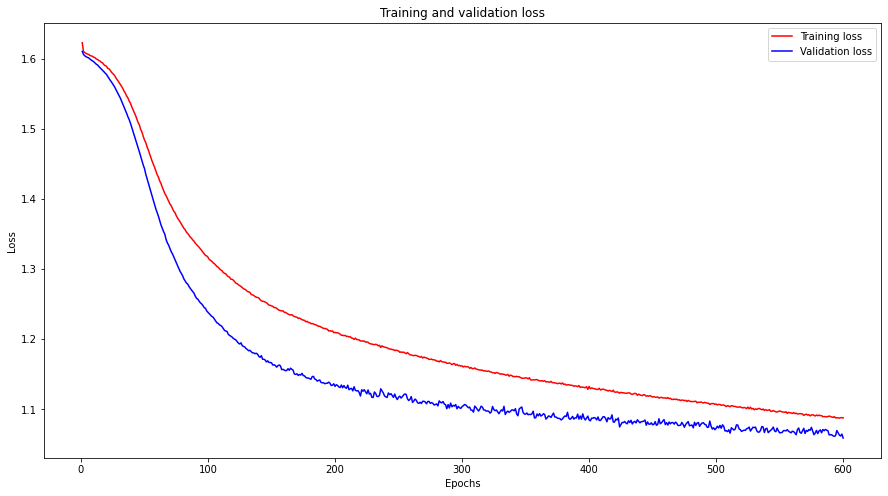

In [9]:
import matplotlib.pyplot as plt
history.history.keys()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

print(f'minimal validation loss = {min(val_loss)}' )


maximal validation accuracy = 0.5771812200546265


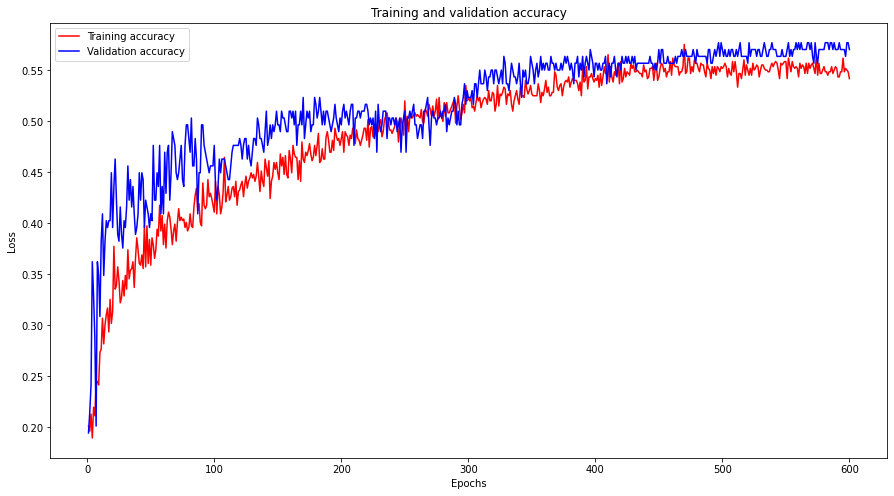

In [10]:
history.history.keys()
accuracy = history.history['categorical_accuracy']
val_accuracy = history.history['val_categorical_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

print(f'maximal validation accuracy = {max(val_accuracy)}' )


In [11]:
np.set_printoptions(precision=3, suppress=True)
for di in range(0, len(data_validation_y)):
    print(
        str(data_validation_y[di])+"\t"+
        str(predictions[di])

    )

[1 0 0 0 0]	[0.053 0.587 0.303 0.046 0.01 ]
[1 0 0 0 0]	[0.791 0.198 0.01  0.    0.   ]
[1 0 0 0 0]	[0.057 0.221 0.618 0.055 0.048]
[1 0 0 0 0]	[0.09  0.104 0.732 0.027 0.047]
[1 0 0 0 0]	[0.071 0.585 0.278 0.053 0.014]
[1 0 0 0 0]	[0.135 0.119 0.638 0.038 0.07 ]
[1 0 0 0 0]	[0.624 0.038 0.296 0.008 0.035]
[1 0 0 0 0]	[0.654 0.136 0.189 0.01  0.012]
[1 0 0 0 0]	[0.771 0.012 0.207 0.001 0.009]
[1 0 0 0 0]	[0.278 0.043 0.609 0.013 0.057]
[1 0 0 0 0]	[0.886 0.011 0.095 0.001 0.006]
[1 0 0 0 0]	[0.852 0.103 0.042 0.001 0.001]
[1 0 0 0 0]	[0.885 0.013 0.093 0.001 0.008]
[1 0 0 0 0]	[0.218 0.027 0.635 0.015 0.105]
[1 0 0 0 0]	[0.289 0.013 0.656 0.004 0.038]
[1 0 0 0 0]	[0.76  0.038 0.184 0.004 0.014]
[1 0 0 0 0]	[0.306 0.025 0.577 0.011 0.081]
[1 0 0 0 0]	[0.05  0.779 0.117 0.048 0.006]
[1 0 0 0 0]	[0.083 0.042 0.77  0.021 0.084]
[1 0 0 0 0]	[0.299 0.154 0.518 0.013 0.015]
[1 0 0 0 0]	[0.157 0.115 0.539 0.059 0.13 ]
[1 0 0 0 0]	[0.387 0.301 0.266 0.026 0.019]
[1 0 0 0 0]	[0.796 0.176 0.027 0